# About


**About Mall Datasets**

This dataset contains information about people visiting the mall. The dataset has gender, customer id, age, annual income, and spending score.

**What is Customer Segmentation?**

Customer Segmentation is the process of division of customer base into several groups of individuals that share a similarity in different ways that are relevant to marketing such as gender, age, interests, and miscellaneous spending habits.

**Environment setup & import neccesary library**

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt # data visualization
from sklearn.cluster import KMeans # Import Sklearn KMeans clustering 
import seaborn as sns


/kaggle/input/mall-customers/Mall_Customers.csv


# Implement Customer Segmentation



**Read Datasets with pandas**

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Check means, std ... with pandas describe method**

In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Check null values & datatypes**

In [4]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

# Customer Gender Visualization

In this, we will create a barplot and a piechart to show the gender distribution across our customer_data dataset.

In [6]:
df.Genre.value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

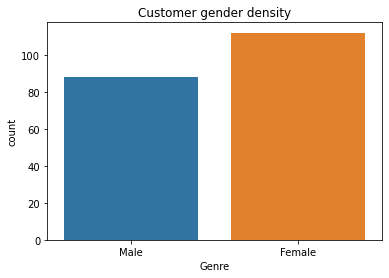

In [7]:
sns.countplot(x='Genre', data=df)
plt.title('Customer gender density')
plt.show()

From the above barplot, we observe that the number of females is higher than the males. Now, let us visualize a pie chart to observe the ratio of male and female distribution.

**Create pie chart**

In [8]:
totalgenre = df.Genre.value_counts()
genrelabel = ['Female', 'Male']

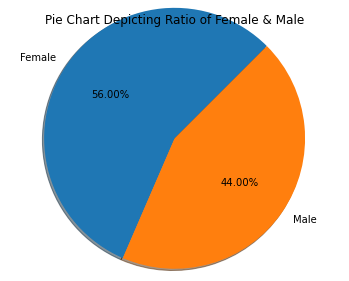

In [9]:
plt.axis('equal') # For perfect circle
plt.pie(totalgenre, labels=genrelabel, radius=1.5, autopct='%0.2f%%', shadow=True, explode=[0, 0], startangle=45)
# radius increase the size, autopct for show percentage two decimal point
plt.title('Pie Chart Depicting Ratio of Female & Male')
plt.show() 
#remove extra text

*From the above graph, we conclude that the percentage of females is 56%, whereas the percentage of male in the customer dataset is 44%.*

# Visualization of Age Distribution with Histogram

Let us plot a histogram to view the distribution to plot the frequency of customer ages. We will first proceed by taking summary of the Age variable.

In [10]:
df['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

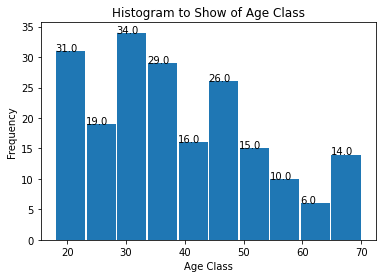

In [11]:
my_bins=10
arr=plt.hist(df['Age'],bins=my_bins, rwidth=0.95) 
plt.xlabel('Age Class')
plt.ylabel('Frequency')
plt.title('Histogram to Show of Age Class')
for i in range(my_bins):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))

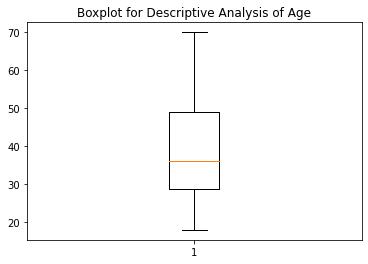

In [12]:
plt.boxplot(df["Age"])
plt.title('Boxplot for Descriptive Analysis of Age')
plt.show()

From the above two visualizations, we conclude that the maximum customer ages are between 30 and 35. The minimum age of customers is 18, whereas, the maximum age is 70.

# Analysis of the Annual Income of the Customers

we will create visualizations to analyze the annual income of the customers. We will plot a histogram and then we will proceed to examine this data using a density plot.

In [13]:
df['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

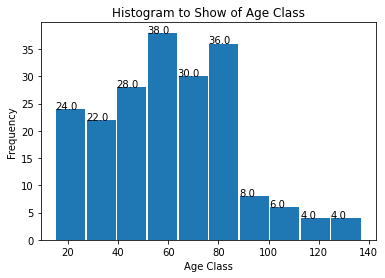

In [14]:
my_bins=10
# Histogram used by deafult 10 bins . bins like range.
arr=plt.hist(df['Annual Income (k$)'],bins=my_bins, rwidth=0.95) 
plt.xlabel('Age Class')
plt.ylabel('Frequency')
plt.title('Histogram to Show of Age Class')
for i in range(my_bins):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))

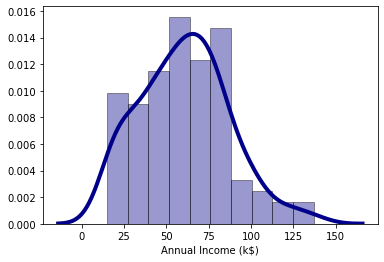

In [15]:
# Density Plot and Histogram of all arrival delays
sns.distplot(df['Annual Income (k$)'], hist=True, kde=True, 
            color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

From the above descriptive analysis, we conclude that the minimum annual income of the customers is 15 and the maximum income is 137. People earning an average income of 70 have the highest frequency count in our histogram distribution. The average salary of all the customers is 60.56. 

# Analyzing Spending Score of the Customers


In [16]:
# Check the summary of Spending Score of the Customers
df['Spending Score (1-100)'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

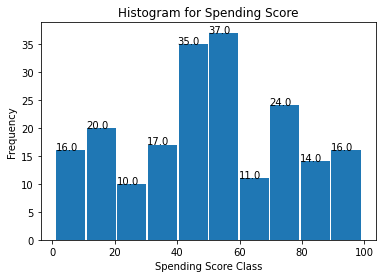

In [17]:
my_bins=10
# Histogram used by deafult 10 bins . bins like range.
arr=plt.hist(df['Spending Score (1-100)'],bins=my_bins, rwidth=0.95) 
plt.xlabel('Spending Score Class')
plt.ylabel('Frequency')
plt.title('Histogram for Spending Score')
for i in range(my_bins):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))

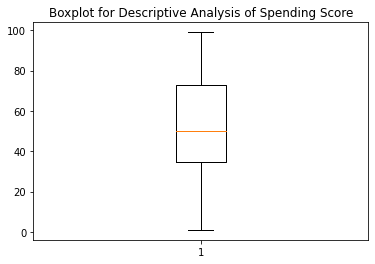

In [18]:
plt.boxplot(df["Spending Score (1-100)"])
plt.title('Boxplot for Descriptive Analysis of Spending Score')
plt.show()

The minimum spending score is 1, maximum is 99 and the average is 50.20. We can see Descriptive Analysis of Spending Score is that Min is 1, Max is 99 and avg. is 50.20. From the histogram, we conclude that customers between class 40 and 50 have the highest spending score among all the classes.

# K-Means Algorithm
K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares. In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible. In here we used elbow Method.

**Elbow Method**

The KElbowVisualizer implements the “elbow” method to help data scientists select the optimal number of clusters by fitting the model with a range of values for K. If the line chart resembles an arm, then the “elbow” (the point of inflection on the curve) is a good indication that the underlying model fits best at that point. In the visualizer “elbow” will be annotated with a dashed line.

In [19]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [20]:
y_predicted = km.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])
# clustering
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [21]:
df['cluster'] = y_predicted
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [22]:
#check centroid
km.cluster_centers_

array([[44.15447154, 49.82926829],
       [86.53846154, 82.12820513],
       [87.        , 18.63157895]])

In [23]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]

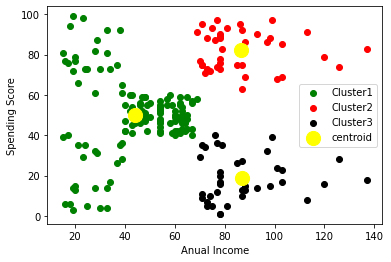

In [24]:
plt.scatter(df0['Annual Income (k$)'], df0['Spending Score (1-100)'], color='green')
plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], color='red')
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], color='black')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='yellow', marker='o', label='centroid', s=200)
plt.xlabel('Anual Income')
plt.ylabel('Spending Score')
plt.legend(['Cluster1', 'Cluster2', 'Cluster3', 'centroid'])

**Check elbow and SSE**

In [25]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    sse.append(km.inertia_)
sse

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37265.86520484347,
 31676.36973205366,
 24990.4343103969,
 21818.114588452183]

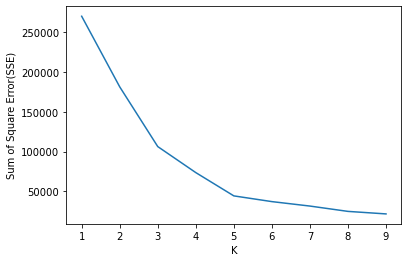

In [26]:
plt.xlabel('K')
plt.ylabel('Sum of Square Error(SSE)')
plt.plot(k_rng, sse)

In figure elbow checking k = 5 is good point.

In [27]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])
# clustering
y_predicted

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0,
       4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [28]:
df['cluster'] = y_predicted
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4


In [29]:
km.cluster_centers_

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

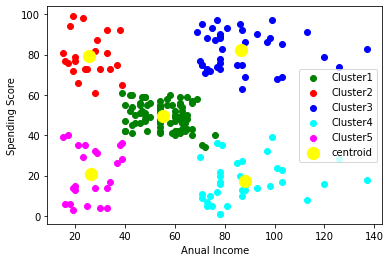

In [30]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]
df3 = df[df.cluster == 3]
df4 = df[df.cluster == 4]
plt.scatter(df0['Annual Income (k$)'], df0['Spending Score (1-100)'], color='green')
plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], color='red')
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], color='blue')
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'], color='cyan')
plt.scatter(df4['Annual Income (k$)'], df4['Spending Score (1-100)'], color='magenta')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='yellow', marker='o', label='centroid', s=150)
plt.xlabel('Anual Income')
plt.ylabel('Spending Score')
plt.legend(['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4', 'Cluster5', 'centroid'])